# Taller 2

El siguiente taller es elaborado por:  <br/>
Johana Alejandra Rátiva <br/>
Juan Manuel Rivera <br/>


**Contexto:** La empresa HabitAlpes tiene un portafolio variado para el sector inmobiliario. Actualmente buscan implementar una herramienta para el calculo de precio de venta de apartamentos en la ciudad de Bogotá.

**Escenario actual:** 
* El calculo del precio de venta del inmueble toma 6 horas de trabajo de un perito ( $ 9500 por hora ). 
* HabitAlpes avalua 500 apartamentos al mes 

<span style="color:red; font-weight:bold;">Objetivo:</span> Usar un algoritmo de machine learning capaz de estimar el precio de un inmueble que permita al perito realizar su trabajo en 1 hora. 

**Implicaciones previstas:** 
* Por cada avaluo subestimado en más de 20M el cliente solicitará un avalúo presencial
* Las sobreestimaciones no son reportadas

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Entendimiento y preparación de los datos

In [217]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 100)

pd.set_option('display.float_format', '{:,.0f}'.format)

df = pd.read_csv('./apartamentos.csv')
df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,"339,000,000",76,3,2,"300,000",1,BRITALIA,3,ENTRE 10 Y 20 ANOS,5,-74,CARRERA 55A # 163-35,"apartamento en venta de 76m2, con vista exteri...",habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,SUBA,URB. PICADELLY,Toberin - Foundever,"1,142",0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,"223,000,000",63,3,2,NaN,0,SAN CRISTOBAL NORTE,3,MAS DE 20 ANOS,5,-74,CARRERA 7F # 153 - 75,"apartamento en venta de 60m2, con vista interi...",habi.co,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,"2,385",0,PARQUE ZONAL ALTA BLANCA,472,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,"440,898,168",54,3,2,"305,000",0,LA SABANA,3,ENTRE 0 Y 5 ANOS,5,-74,CARRERA 69C #2 - 60,"apartamento en venta de 54m2, con vista exteri...",habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232,1,PARQUE METROPOLITANO TERCER MILENIO,961,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,"158,000,000",43,2,2,"106,600",0,TIBABUYES,2,ENTRE 10 Y 20 ANOS,5,-74,CALLE 131C # 126-95,"apartamento en venta de 43 m2, con vista inter...",habi.co,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,SUBA,LA ESTRELLA II,Portal Suba,"2,275",0,PARQUE ZONAL LA GAITANA,540,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,"222,800,000",48,3,2,"151,000",0,VERBENAL,3,MAS DE 20 ANOS,5,-74,CARRERA 5 # 187-15,"apartamento duplex en venta de 48m2, con vista...",habi.co,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,"2,099",0,PARQUE VECINAL DESARROLLO VERBENAL I,"1,661",0


In [218]:
print(df.shape)
df.info()

(43013, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 14  longitud  

In [219]:
df[["tipo_propiedad","tipo_operacion"]].value_counts()

tipo_propiedad             tipo_operacion  
APARTAMENTO                VENTA               27200
                           ARRIENDO            15515
                           VENTA Y ARRIENDO      228
CASA CON CONJUNTO CERRADO  VENTA                  60
CASA                       VENTA                  10
Name: count, dtype: int64

In [220]:
pd.set_option('display.float_format', '{:,.6f}'.format)
df[["tipo_propiedad","tipo_operacion"]].value_counts(normalize=True)

tipo_propiedad             tipo_operacion  
APARTAMENTO                VENTA              0.632367
                           ARRIENDO           0.360705
                           VENTA Y ARRIENDO   0.005301
CASA CON CONJUNTO CERRADO  VENTA              0.001395
CASA                       VENTA              0.000232
Name: proportion, dtype: float64

**Notas:**  

* La base de datos cuenta con  <span style="color:red; font-weight:bold;">43013 registros y 46 columnas.</span> 

* Se puede evidenciar que en su mayoría se tiene registro de inmuebles de tipo "APARTAMENTO". con tipo de oferta "VENTA" esta característica combinada representa un 63% de los datos lo cual es un buen incio para abordar el caso de negocio actual.

* Se propone filtrar la base de datos con estas características dado que la variable respuesta debe ser precio de venta para inmuebles de tipo apartamento.

(Se deja como opción analizar el ratio de los inmuebles con doble oferta (venta y arriendo) para obtener un ratio que permita imputar la variable precio_venta a partir de la operacion ( precio_arriendo * ratio ) de presentarse la necesidad de contar con mas datos.) (Ratio sugerido: 0.006)

In [221]:
pd.set_option('display.float_format', '{:,.6f}'.format)
df["ratio_inmobiliario"]=df.loc[(~df["precio_arriendo"].isna()) & (~df["precio_venta"].isna()),
       "precio_arriendo"] / df.loc[(~df["precio_arriendo"].isna()) & (~df["precio_venta"].isna()),
                                 "precio_venta"]
df["ratio_inmobiliario"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.99])

count   403.000000
mean      0.138381
std       0.476284
min       0.000004
1%        0.002526
5%        0.003534
25%       0.004581
50%       0.005185
75%       0.006107
90%       0.881688
99%       1.263752
max       5.142857
Name: ratio_inmobiliario, dtype: float64

In [222]:
# Filtar el dataframe para inmuebles tipo APARTAMENTO y operacion VENTA o VENTA Y ARRIENDO
df =df.loc[(df["tipo_propiedad"]=="APARTAMENTO") & (df["tipo_operacion"].isin(['VENTA','VENTA Y ARRIENDO']))]
df.shape

(27428, 47)

In [223]:
# Prueba de consistencia después del filtrado
df.loc[df["precio_venta"].isna()]

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque,ratio_inmobiliario


<span style="color:red; font-weight:bold;">La base filtrada tiene 27428 registros de apartamentos con valores de venta diligenciados</span> 

## Analisis Exploratorio

C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\3974092739.py:12: FutureWarning: 

Passing `palette` with

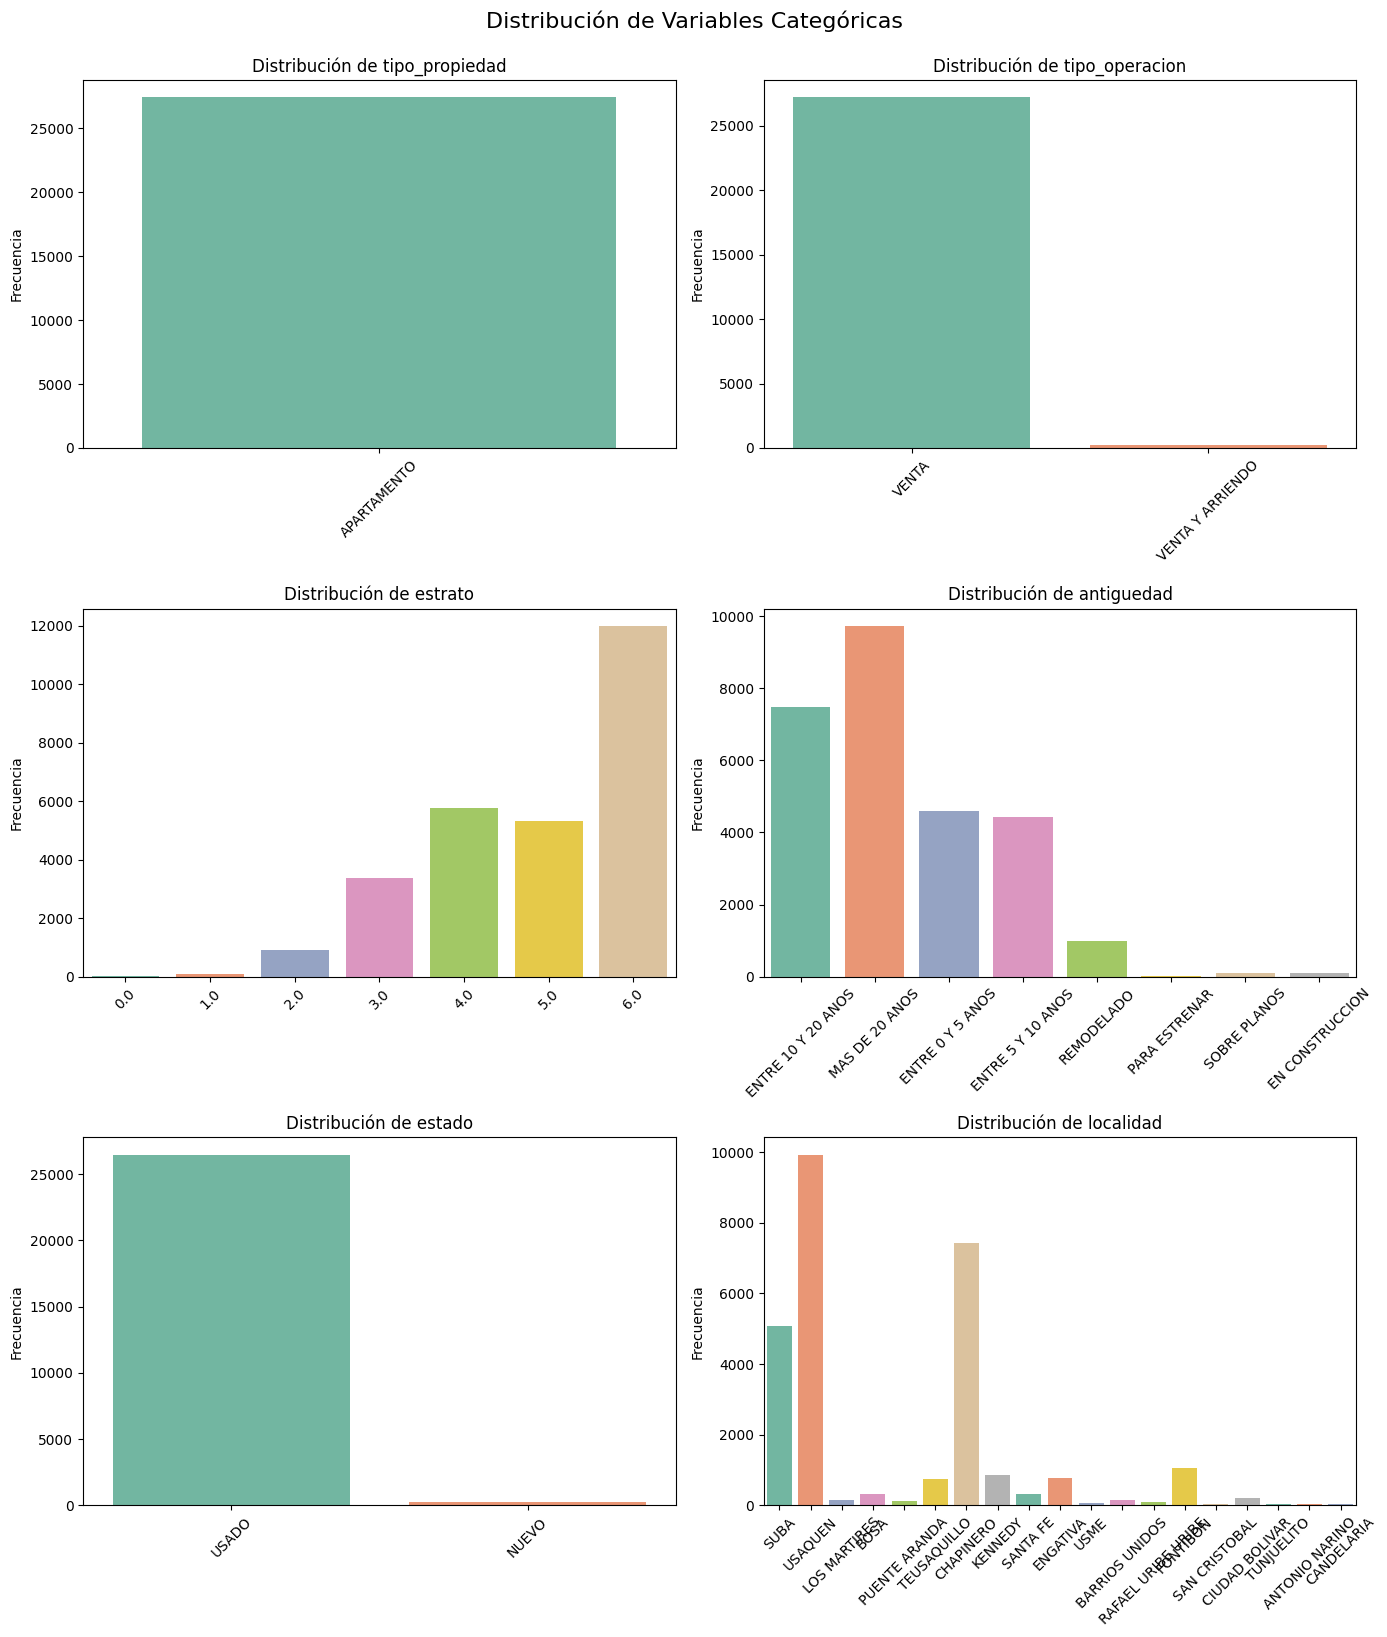

In [224]:
# Graficar distribuciones de variables categóricas
columnas_categoricas = ['tipo_propiedad','tipo_operacion','estrato',
                        'antiguedad','estado','localidad']

num_cols = 2  # columnas de subplots
num_rows = (len(columnas_categoricas) + 1) // num_cols  # filas necesarias

plt.figure(figsize=(14, 16))

for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Distribución de Variables Categóricas", fontsize=16, y=1.02)
plt.show()

C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jarat\AppData\Local\Temp\ipykernel_6012\1194927509.py:15: Future

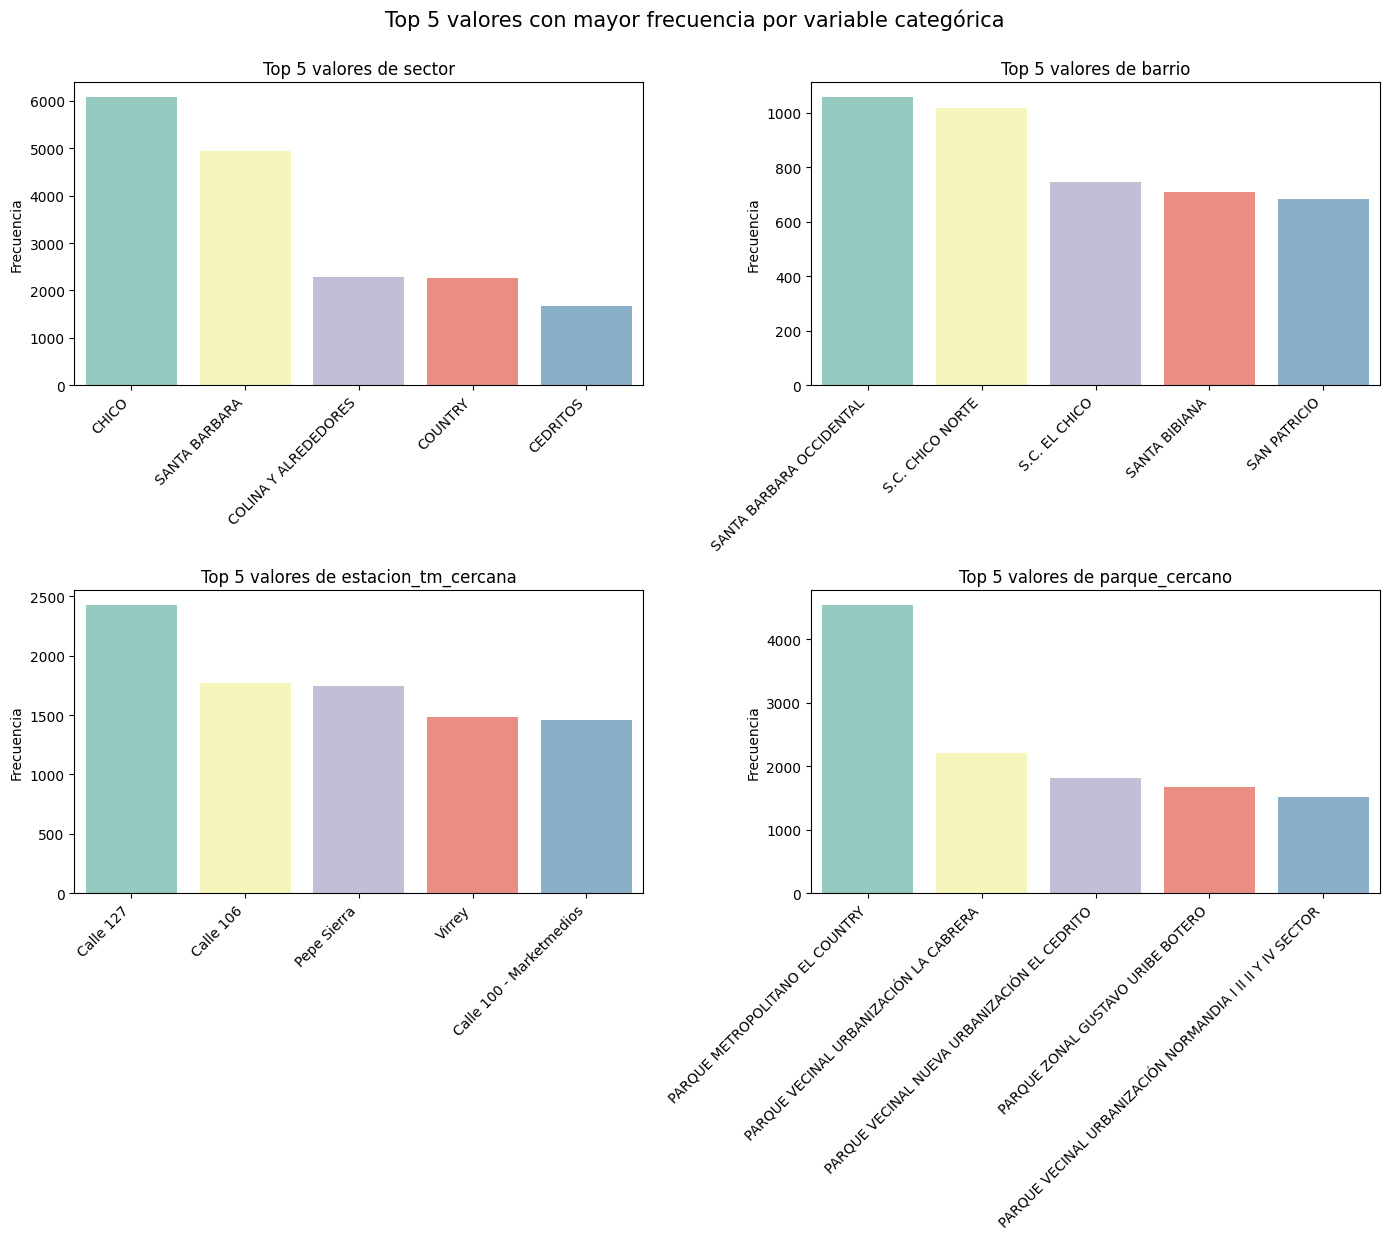

In [225]:
# Variables ccategoricas adicionales que contienen muchas clases por lo cual se priorizan las top 5
import matplotlib.pyplot as plt
import seaborn as sns

columnas_top5 = ['sector', 'barrio', 'estacion_tm_cercana', 'parque_cercano']

plt.figure(figsize=(14, 12))

for i, col in enumerate(columnas_top5, 1):
    plt.subplot(2, 2, i)

    # Obtener top 5 valores más frecuentes
    top5 = df[col].value_counts().nlargest(5)

    sns.barplot(x=top5.index, y=top5.values, palette='Set3')
    plt.title(f'Top 5 valores de {col}')
    plt.ylabel('Frecuencia')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Top 5 valores con mayor frecuencia por variable categórica', y=1.03, fontsize=15)
plt.show()


Notas:

<span style="color:red; font-weight:bold;">Descripción de variables categoricas: </span> 

* Estrato: Aunque existen inmuebles publicados en todos los estratos, se observa un predominio marcado del estrato 6, seguido de los estratos 4 y 5. Esto indica una mayor oferta en zonas de alta capacidad adquisitiva.

* Antigüedad: La mayoría de los apartamentos corresponde a inmuebles usados, con una concentración principal en los segmentos de más de 20 años y entre 10 y 20 años. Los inmuebles nuevos, en construcción o para estrenar presentan participaciones menores.

* Localidad y barrio: Las localidades de Usaquén, Teusaquillo y Suba concentran la mayor cantidad de registros. A nivel de barrios y sectores, destacan Chicó, Santa Bárbara y Country, entre otros, lo que refuerza el patrón de concentración geográfica en zonas de estratos altos.

* Variables espaciales relacionadas (estación de TransMilenio cercana y parque cercano): Su distribución refleja el mismo patrón geográfico observado para localidad y barrio. Se puede afirmar que existe una asociación espacial clara, lo cual sugiere que estas variables podrían aportar información redundante. Por ahora se mantienen en el análisis, dejando que el modelo determine su relevancia.

<span style="color:red; font-weight:bold;"> Hallazgos que motivan pasos siguientes </span>

Propendiendo por una mejor caldiad del dataset:

* Revisión y ajuste del estrato: Se identifican frecuencias bajas en estratos 0 y 1 que probablemente corresponden a errores de registro. Se propone imputarlos con base en la moda del estrato por barrio, pero solo en los casos donde la diferencia entre el estrato reportado y el estrato modal sea mayor o igual a 2, para evitar imputaciones excesivas.

* Acotar el universo del análisis: Para esta primera iteración se propone excluir inmuebles clasificados como "PARA ESTRENAR", "SOBRE PLANOS" y "EN CONSTRUCCION", con el fin de ajustar un modelo enfocado exclusivamente en apartamentos usados y evitar mezclar dinámicas de precios de mercados diferentes.


<span style="color:red; font-weight:bold;"> Limpieza del dataset </span>


A continuación, se describe la variable dependiente precio_venta por estrato socioeconómico, con el propósito de identificar atípicos y asegurar una imputación controlada.

El análisis descriptivo inicial muestra que los estratos 0 y 1 presentan intervalos de precio que se solapan con estratos más altos, lo cual sugiere posibles errores de captura o inconsistencias en la clasificación.
Para abordar esto, se calculó la moda del estrato por barrio y luego se comparó con el estrato registrado. Con esta diferencia, se imputaron únicamente aquellos inmuebles cuya discrepancia entre la moda del barrio y el valor registrado era mayor o igual a dos niveles socioeconómicos.

En total, se realizaron 412 ajustes de estrato.
Posteriormente, y una vez depurados los estratos inconsistentes, se identificaron precios de venta superiores al percentil 0.99 dentro de cada estrato.

Dado que algunos inmuebles pueden requerir métodos de valoración especializados (como enfoque de renta o análisis de desarrollo potencial) o corresponder a errores de captura, se decidió eliminar los atípicos por estrato que superan el percentil 0.99 o sean inferiores al percentil 0.003
Como resultado, se excluyeron 355 inmuebles con precios de venta extraordinariamente altoso bajos en relación con su estrato.

Adicionalmente se eliminaron 78 atipicos por areas muy pequeñas o muy grandes.

In [226]:
# Revision de estadisticas por estrato antes de la imputación de estrato

pd.set_option('display.float_format', '{:,.0f}'.format)

df= df.loc[~df["antiguedad"].isin(["PARA ESTRENAR","SOBRE PLANOS","EN CONSTRUCCION"])] 

tabla_estadisticas = (
    df.groupby("estrato")["precio_venta"]
      .describe()    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,25%,50%,75%,max
0,0,7,"2,526,857,143","1,066,215,649","850,000,000","1,875,000,000","2,500,000,000","3,394,000,000","3,800,000,000"
1,1,79,"616,096,893","930,252,028","83,000,000","131,819,540","162,000,000","447,500,000","4,400,000,000"
2,2,900,"495,891,757","9,495,472,694","76,000,000","133,375,000","159,930,000","180,000,000","285,000,000,000"
3,3,"3,321","351,403,643","3,386,204,708","100,000,000","198,000,000","256,000,000","331,500,000","195,000,000,000"
4,4,"5,689","692,388,018","10,034,337,527","1,100,000","350,000,000","450,000,000","595,000,000","690,000,000,000"
5,5,"5,234","2,307,273,338","42,857,741,803","1,160,000","525,000,000","717,000,000","995,000,000","2,100,000,000,000"
6,6,"11,971","3,954,459,285","79,333,434,345","1,000,000","863,000,000","1,350,000,000","2,100,000,000","4,250,000,000,000"


In [227]:
# Conteo de estratos inconsistentes a imputar
reglas = df.groupby("barrio")["estrato"].agg(lambda x: x.mode()[0])
df["estrato_inconsistente"] = df["estrato"] != df["barrio"].map(reglas)

df_diff = (
    df[["precio_venta","barrio","estrato","estrato_inconsistente"]]
    .loc[df["estrato_inconsistente"]==True]
    .merge(reglas.rename("estrato_moda_por_barrio"), 
           left_on="barrio", right_index=True)
)

df_diff["diferencia_estrato"] = (
    (df_diff["estrato_moda_por_barrio"] - df_diff["estrato"]).abs()
)

df_diff.loc[df_diff["diferencia_estrato"] >= 2].value_counts("estrato")

estrato
6    130
4    124
3     68
2     30
5     27
1     26
0      7
Name: count, dtype: int64

In [228]:
# Ajuste de estratos inconsistentes con diferencia mayor a 2 niveles
df["estrato_moda"] = df["barrio"].map(reglas)
df["diferencia"] = (df["estrato_moda"] - df["estrato"]).abs()

df.loc[df["diferencia"] >= 2, "estrato"] = df.loc[df["diferencia"] >= 2, "estrato_moda"]


In [229]:
# Revision de estadisticas por estrato después de la imputación de estrato

tabla_estadisticas = (
    df.groupby("estrato")["precio_venta"]
      .describe(percentiles= [0.003,0.25, 0.5, 0.75, 0.99] )    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,0.3%,25%,50%,75%,99%,max
0,1,53,"154,202,916","63,316,905","83,000,000","84,404,000","130,000,000","134,640,000","162,000,000","418,400,000","525,000,000"
1,2,881,"495,616,097","9,596,683,147","76,000,000","88,000,000","133,000,000","158,500,000","180,000,000","496,000,000","285,000,000,000"
2,3,"3,307","356,074,603","3,394,496,416","100,000,000","127,063,722","198,000,000","256,000,000","335,000,000","892,220,000","195,000,000,000"
3,4,"5,701","1,274,221,274","44,057,516,762","1,100,000","170,000,000","350,000,000","450,000,000","599,000,000","2,200,000,000","3,240,000,000,000"
4,5,"5,241","2,303,706,198","42,829,203,173","1,160,000","208,600,003","520,000,000","710,000,000","990,000,000","3,000,000,000","2,100,000,000,000"
5,6,"12,018","3,667,279,165","73,469,251,531","1,000,000","161,020,000","853,875,000","1,350,000,000","2,100,000,000","6,546,754,700","4,250,000,000,000"


In [235]:
# # Calcular el percentil 0.003 y 0.99 por estrato y eliminación de atipicos

df["p99"] = df.groupby("estrato")["precio_venta"].transform(lambda x: x.quantile(0.99))
df["p003"] = df.groupby("estrato")["precio_venta"].transform(lambda x: x.quantile(0.003))

# Identificar atípicos por estrato (menores al p0.3% o mayores al p99)
df_outliers = df[(df["precio_venta"] > df["p99"]) | 
                 (df["precio_venta"] < df["p003"])]

# Dataset limpio
df_limpio = df[(df["precio_venta"] <= df["p99"]) & 
               (df["precio_venta"] >= df["p003"])]

print("Atípicos eliminados:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados: 355


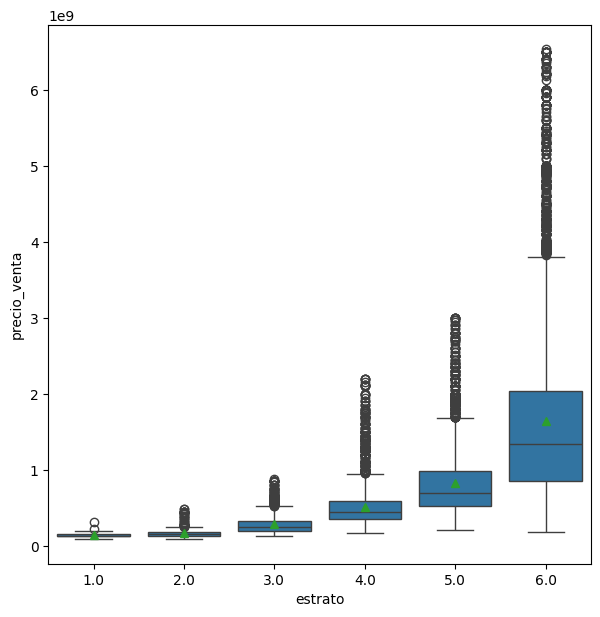

In [236]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
ax = sns.boxplot(
    data=df_limpio#.loc[df["estrato"].isin([2,3])]
    ,
    x='estrato',
    y='precio_venta',
    showmeans=True
)


plt.show()

Se observa un comportamiento coherente de los precios de venta por estrato, donde las medias de los estratos más altos superan a las de los estratos más bajos, como sería esperado.
Además, gracias al proceso de limpieza de atípicos, los intervalos de precio correspondientes a cada estrato muestran una separación más definida y consistente.

In [237]:
tabla_estadisticas = (
    df_limpio.groupby("estrato")["precio_venta"]
      .describe(percentiles= [0.25, 0.5, 0.75, 0.99] )    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,25%,50%,75%,99%,max
0,1,51,"148,328,521","35,818,799","92,000,000","130,402,322","134,640,000","162,000,000","271,248,000","320,000,000"
1,2,870,"165,508,944","52,735,857","88,000,000","133,000,000","158,100,000","179,900,000","433,100,000","485,000,000"
2,3,"3,263","281,841,379","110,651,592","127,069,414","198,000,000","255,000,000","330,000,000","662,830,412","880,000,000"
3,4,"5,628","509,026,360","249,654,193","170,000,000","350,000,000","450,000,000","590,000,000","1,550,000,000","2,200,000,000"
4,5,"5,174","827,775,010","436,295,688","210,000,000","520,000,000","700,000,000","985,000,000","2,413,500,000","3,000,000,000"
5,6,"11,860","1,638,934,563","1,087,356,738","180,000,000","853,024,000","1,340,000,000","2,040,000,000","5,500,000,000","6,530,910,000"


In [238]:
df_limpio.shape

(26846, 53)

<span style="color:red; font-weight:bold;"> Como resultado de este proceso de depuración y control de calidad, el dataset queda conformado por 26846 inmuebles de tipo apartamento usado </span>

En este punto se procede plotear las variables cuantitativas


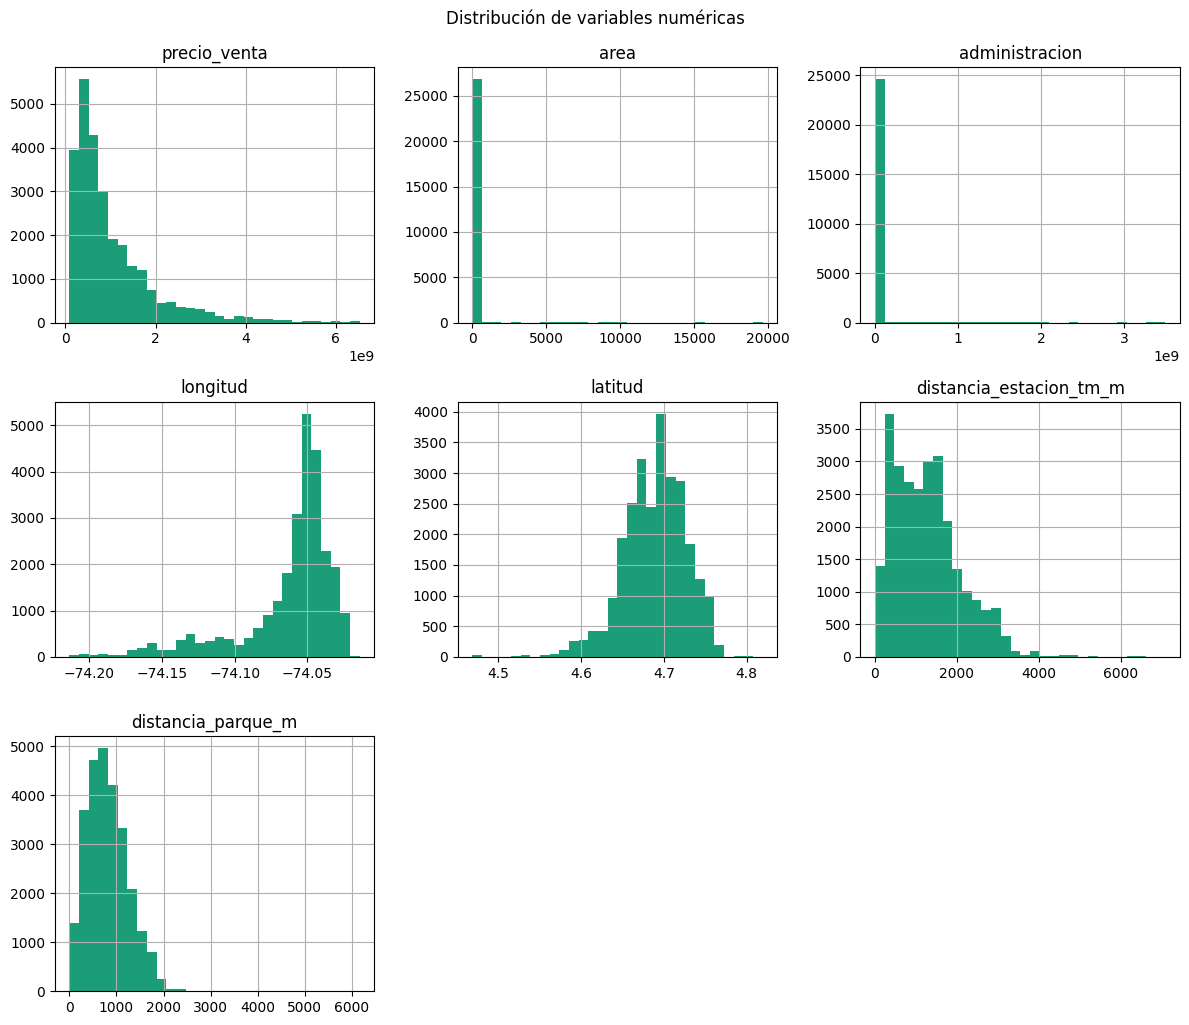

In [ ]:
# Histogramas de variables numéricas
pd.set_option('display.float_format', '{:,.0f}'.format)

columnas_numericas = ['precio_venta','area','administracion','longitud','latitud','distancia_estacion_tm_m','distancia_parque_m']
df_limpio[columnas_numericas].hist(bins=30, figsize=(12,10), color='#1b9e77')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.show()



In [248]:
df_limpio[['precio_venta','area','administracion','longitud','latitud',
           'distancia_estacion_tm_m','distancia_parque_m']].describe(percentiles=[0.002,0.01,0.05,0.25,0.5,0.75,0.9,0.999])

,precio_venta,area,administracion,longitud,latitud,distancia_estacion_tm_m,distancia_parque_m
count,"26,846","26,846","24,704","26,846","26,846","26,846","26,846"
mean,"1,030,197,353",142,"5,046,574",-74,5,"1,282",817
std,"946,557,425",234,"76,633,199",0,0,837,443
min,"88,000,000",0,1,-74,4,5,0
0.2%,"114,690,000",18,"10,000",-74,5,38,38
1%,"135,000,000",29,"10,000",-74,5,112,87
5%,"188,834,071",43,"110,000",-74,5,237,202
25%,"410,000,000",70,"350,000",-74,5,586,490
50%,"705,000,000",110,"650,000",-74,5,"1,195",765
75%,"1,300,000,000",180,"1,178,000",-74,5,"1,728","1,092"


In [252]:
# outliers de area menor a 0.002 o mayores a 0.99

df_outliers = df_limpio[(df_limpio["area"] < df_limpio["area"].quantile(0.002)) | 
                 (df_limpio["area"] > df_limpio["area"].quantile(0.999))]

df_outliers

# Dataset limpio
df_limpio = df_limpio[(df_limpio["area"] > df_limpio["area"].quantile(0.002))  & 
              (df_limpio["area"] < df_limpio["area"].quantile(0.999))]

print("Atípicos eliminados por area:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados por area: 81


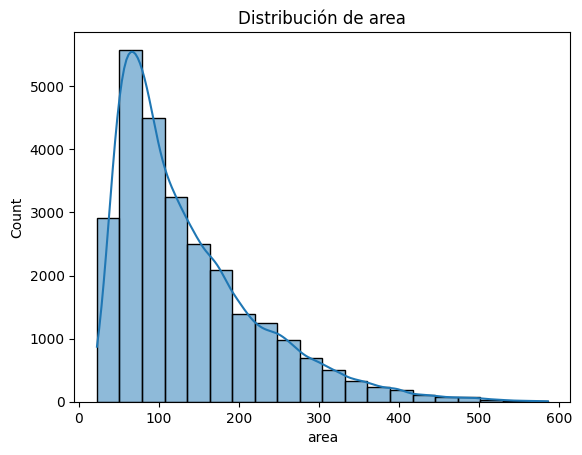

In [253]:
sns.histplot(df_limpio['area'], bins=20, kde=True)
plt.title('Distribución de area')
plt.xlabel('area')
plt.show()

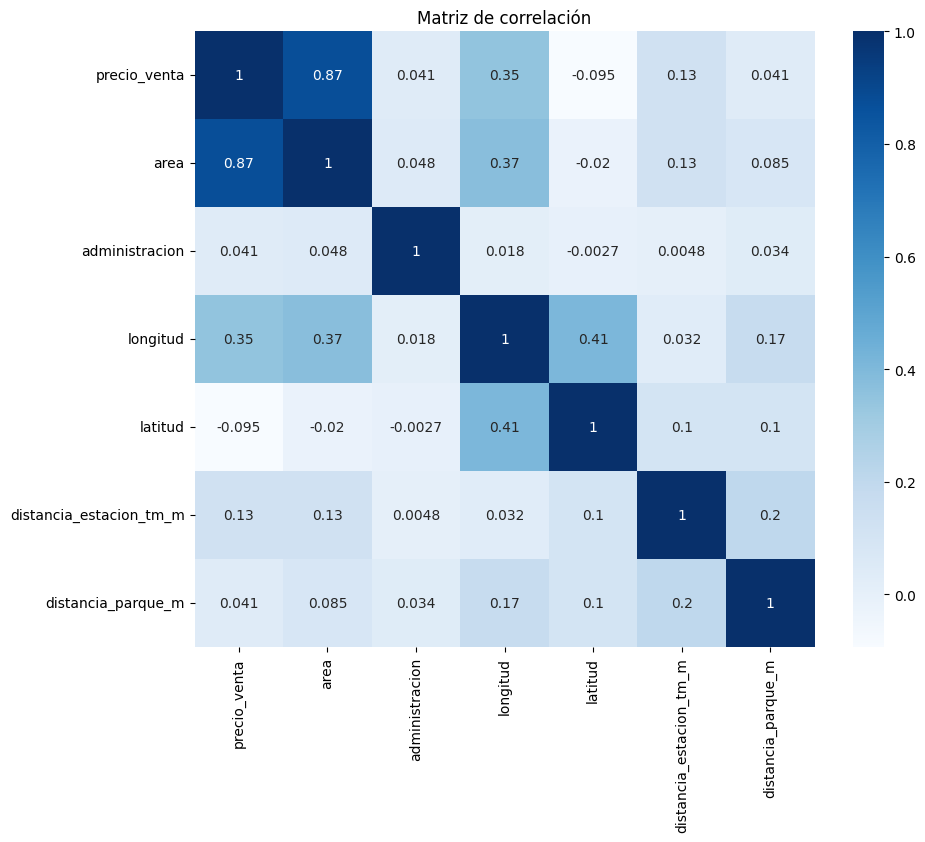

In [260]:
import numpy as np
correlation = df_limpio[['precio_venta','area','administracion','longitud','latitud',
           'distancia_estacion_tm_m','distancia_parque_m']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Matriz de correlación')
plt.show()

## Modelado

1. crear el traint, test y validation
2. Crear al menos dos modelos distintos para predecir el precio_venta
3. Metricas
4. Elegir un modelo y jsutificarlo, oportunidades de mejora
5. interpretabilidad shapley line 
6. generacion de valor 
7. insights

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= df_limpio.drop(columns=['precio_venta','tipo_propiedad','tipo_operacion',
                         'estrato_moda','diferencia','p99','p003','_id','codigo','p0003','estrato_inconsistente','descripcion', 
                         'website', 'last_view', 'datetime', 'url', 'timeline','estado', 'compañia','coords_modified',
                         'ratio_inmobiliario' #puede darle pista al modelo
                         ])

y= df_limpio['precio_venta']
print("Las caracteristicas iniciales del dataset son:", X.columns , "Para describir la variable", y.name)


# Se divide el conjunto inicialmente en train (70%) y temp (30%)
# Luego se divide temp en validacion (15%) y test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

scaler = StandardScaler()  # Inicializar el escalador. El escalador convierte las variables numericas a una escala comun con media =0 y desviación estándar =1

X_train_scaled = scaler.fit_transform(X_train) # fit_transform hace fit y transform en una sola línea.
                                                    #fit: calcula media y desviación estándar de los datos numericos del train,
                                                    #transform: aplica el escalado a los datos numericos del train                                               
#  el fit solo se hace con los datos del train para evitar el data leakage (fuga de datos)

X_test_scaled = scaler.transform(X_test) 
# Se usa transform para no "ver" los datos del test en el escalado. No usa fit para no aprender los parametros. 
# Sin embargo si aplica el escalado usando la media y desviacion estandar calculadas con los datos del train.


Las caracteristicas iniciales del dataset son: Index(['area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'sector', 'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'precio_arriendo', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'localidad',
       'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque'],
      dtype='object') Para describir la variable precio_venta


In [261]:
# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
residuos = y - y_pred

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R² (coeficiente de determinación): {r2:.3f}')
print(f'MAE (error absoluto medio): {mae:.2f}')
print(f'RMSE (raíz del error cuadrático medio): {rmse:.2f}')

ValueError: could not convert string to float: 'BRITALIA'